## Data cleaning

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")
steps.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = survey.merge(steps, on="id")
df = df[(df["weight"] < 200) & (df["weight"] > 35)]
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_2 = df.fillna(0)
df_2['mean'] = df.iloc[:, 9:].mean(axis=1)
df_2['median'] = df.iloc[:, 9:].median(axis=1)

df_2.head()


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,median
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10205.521212,9860.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313,5374.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,8301.729730,8220.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3633.200000,3000.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5312.129630,4986.5


/Users/arjan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


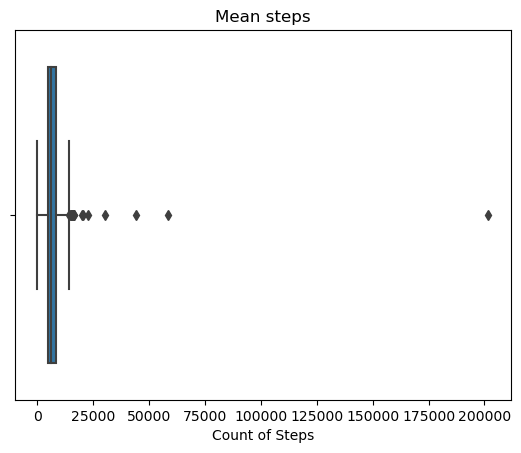

In [39]:
sns.boxplot(df_2["mean"]) 
plt.title('Mean steps')
plt.xlabel('Count of Steps')
plt.show()



In [43]:
df_2.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,median
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,...,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.0,920.000000,920.000000
mean,464.225108,2.339827,2.525974,171.540043,72.284632,94.608225,2342.581169,3238.246753,2357.580087,3070.409091,...,511.169913,598.188312,382.332251,735.410173,708.741342,596.623377,536.109307,0.0,7021.510401,6131.439130
std,267.681497,1.226864,1.273267,10.668933,15.453637,851.578749,5139.210099,6043.226719,5134.351360,5174.563346,...,2349.675324,2884.088571,2359.914861,3241.397025,2776.281220,3148.097942,2302.266645,0.0,7406.689567,2802.436433
min,1.000000,1.000000,1.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,4.000000
25%,232.750000,1.000000,1.000000,165.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4633.941050,4031.500000
50%,464.500000,2.000000,2.000000,172.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6244.931602,5790.000000
75%,695.250000,3.000000,4.000000,179.000000,81.000000,0.000000,338.000000,4871.000000,2466.750000,5707.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8366.832967,7912.750000
max,929.000000,11.000000,5.000000,195.000000,155.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,0.0,201722.600000,15583.000000


In [44]:
df_3 = df_2[(df_2["mean"] < 30000)]
df_3
#Ik haal hiermee values weg die ervoor zorgen dat de boxplot niet kan lezen 

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,median
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10205.521212,9860.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313,5374.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,8301.729730,8220.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3633.200000,3000.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5312.129630,4986.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6282.131868,6104.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4799.880000,4240.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10030.326829,8849.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15679.679012,14084.0


/Users/arjan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


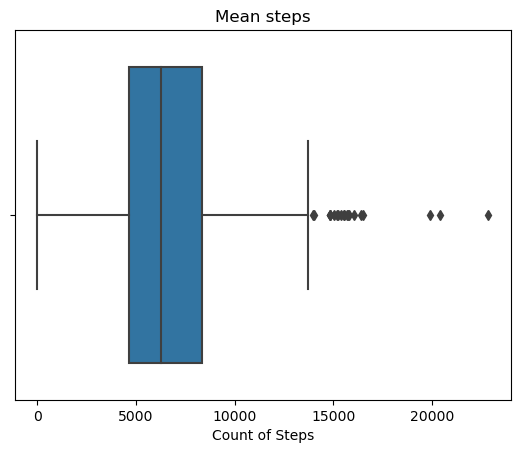

In [45]:
sns.boxplot(df_3["mean"]) 
plt.title('Mean steps')
plt.xlabel('Count of Steps')
plt.show()

In [47]:
#wat ik hier uit kan halen is dat de meeste mensen rond de 6000 stappen lopen. 
#De mean ligt ongeveer tussen de 5000 en 8000 stappen.
#Er zijn ook een aantal mensen die ver boven het gemiddelde zitten.
#Om de boxplot leesbaar te maken moest ik er ook een paar weglaten, maar het lijkt alsof er echte sporters en misschien zelfs topsporters in de steekproef zijn opgenomen.
#Het is natuurlijk ook mogenlijk dat die paar mensen hun count of steps oneerlijk hebben verzameld, door het aan een machine te hangen of zoiets.
#Ik ga er in ieder geval van uit dat hele fitte mensen/sporters zijn opgenomen in de steekproef.

#De variatie van dit model is klein beetje hoog. Het ligt redelijk in dezelfde range (100-15000) behalve de echte sporters
#De outliers heb ik daarnet omschreven
#De skewness zit duidelijk rechts. De grootste groep mensen zitten tussen de 4500-8000 stappen ongeveer (van wat ik met mijn ogen kan zien, dit is niet geteste informatie)
#Het heeft een bellcurve waarvan de 34%-34% op 5000-8000 ligt.

/Users/arjan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


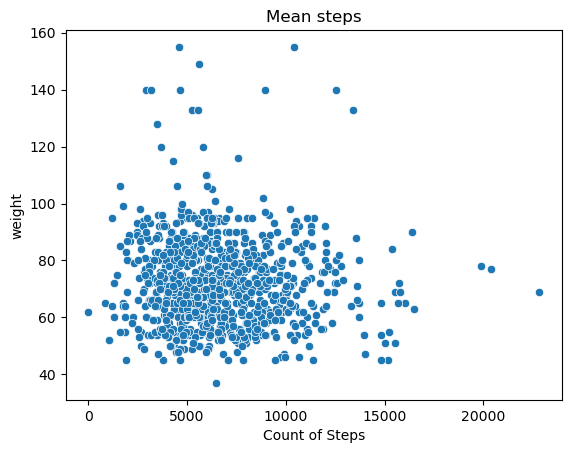

In [52]:
sns.scatterplot(df_3["mean"], df_3['weight']) 
plt.title('Mean steps')
plt.xlabel('Count of Steps')
plt.ylabel('weight')
plt.show()

In [53]:
#Door het aantal stappen te vergelijken met het gewicht van mensen komen een paar interesante dingen tevoorschijn.
#De meeste mensen hebben een gewicht tussen de 60 en de 80 en bewegen ongeveer 5000 tot 8000 stappen. Ik kan de mean van de boxplot hier ongeveer in terugvinden.
#De outliers hiervan zijn vooral interessant. Een paar van de zwaarste mensen bewegen ook veel meer dan normaal. 
#Er zijn een paar mensen die 130+ kilo zijn die meer dan 10000 stappen hebben gezet.
#Het is ook opmerkzaam dat een paar van de lichtste mensen het meeste rennen. Er zijn mensen die ongeveer op 50-60 kilo zitten die 14000-15000 stappen bereiken

In [54]:
#Begin linear regression

In [55]:
#Scatterplots van steps

In [75]:
#Ik pak vooral deze omdat de rest categorieën zijn die geen invloed hebben op renmogelijkheid 
#Ik denk niet dat je sneller zou kunnen rennen als je big data hebt gestudeerd aan de universiteit
df_subset1 = df_3[['mean', 'age', 'height', 'weight', 'median']]
df_subset1 

,mean,age,height,weight,median
0,10205.521212,25-34,178.0,98.0,9860.0
1,5687.423313,35-44,180.0,77.0,5374.0
2,8301.729730,25-34,180.0,83.0,8220.0
3,3633.200000,<25,178.0,80.0,3000.0
4,5312.129630,25-34,167.0,61.0,4986.5
...,...,...,...,...,...
924,6282.131868,45-54,165.0,59.0,6104.0
925,4799.880000,<25,192.0,90.0,4240.0
926,10030.326829,35-44,181.0,71.0,8849.0
927,15679.679012,55-64,172.0,65.0,14084.0


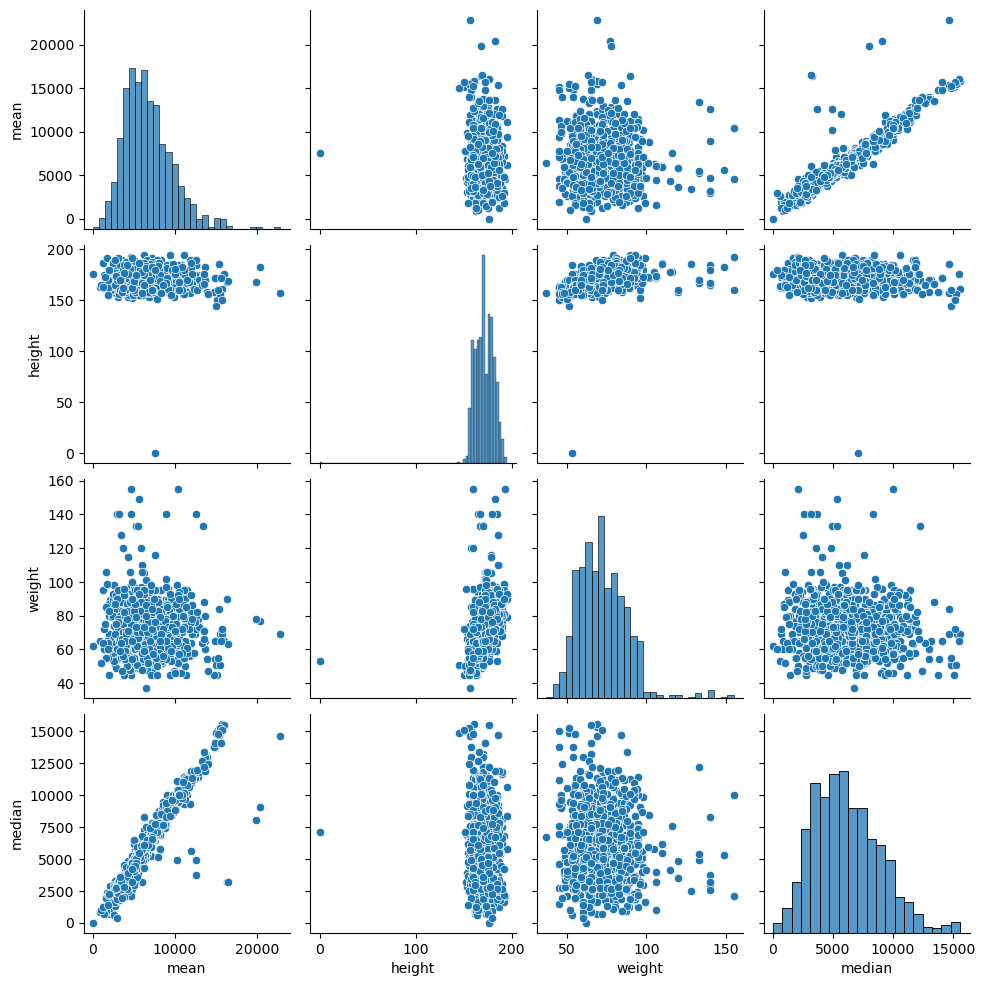

In [76]:
sns.pairplot(df_subset1)
plt.show()

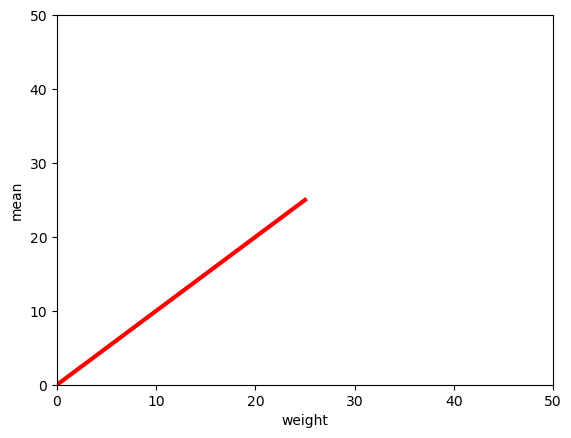

In [77]:
sns.scatterplot(x='weight', y='mean',data=df_subset1)
plt.xlim(0, 50) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 50) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 25], [0, 25], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('weight')
plt.ylabel('mean')
plt.show()
#ik zet voor de lol een scatterplot erin, in de hoop dat ik er iets uit kan lezen. Het scatter gedeelte toont zich niet dus ik kan er niks over zeggen.

In [78]:
cerr = df_subset1.corr()
cerr


,mean,height,weight,median
mean,1.000000,-0.070461,-0.062901,0.931326
height,-0.070461,1.000000,0.454364,-0.075356
weight,-0.062901,0.454364,1.000000,-0.089159
median,0.931326,-0.075356,-0.089159,1.000000


In [79]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_subset1['height'], df_subset1['mean'])

-446601.77375095704

In [80]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_subset1['height'], df_subset1['weight'])

-87.06309062678751

In [81]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_subset1['mean'], df_subset1['weight'])

-5.106882334081654

In [65]:
#Vanuit de calculaties is er te zien dat er weinig overeenkomst is tussen hoe lang iemand is, of hoeveel hij weegt samen het hoeveel stappen hij heeft gelopen.
#wel blijkt het dat er nog een paar impossible values in de dataset zitten. 
#Er zitten onmogelijk outliers in, zoals mensen die minder dan 10 cm lang zijn.
#Er zitten wel interessante correlaties tussen weight en mean maar die had ik eerder ook al behandeld.

In [68]:
#Wat is linear regression:
#linear regression is een methode om te tonen wat je al weet van een data set en waar die data zit,
#Het toont wat we nog niet kunnen uitleggen en hoe dat in relatie staat met wat we wel al weten.

In [96]:
#Ik probeer hier een voorspelling te maken
from sklearn.linear_model import LinearRegression 
x = df_subset1[['mean']] 
y = df_subset1['median']
lm = LinearRegression() 
lm = lm.fit(x, y) 
df['mean_p'] = lm.predict(x) 
df.head(10)


ValueError: Length of values (916) does not match length of index (924)

In [95]:
from sklearn.linear_model import LinearRegression 

#Ik probeer het opnieuw 
x = df_subset1[['mean']] 
y = df_subset1['median']
lm = LinearRegression() 
lm = lm.fit(x, y) 
lm

LinearRegression()

In [89]:
#Ik zit op dit moment vast en kom niet verder.
#Vanuit de data die we al hadden is wel te zien dat het toch niet veel uit had gemaakt. 
#Er zit erg weinig correlatie tussen de verschillende waardes, en dat de predictions dus ook niks zouden worden.
#Dus wat ik ga proberen te doen is focussen op de rest van de data.

In [85]:
from sklearn.metrics import r2_score 
r2_score(df_subset1['median'], df_subset1['mean'])

0.8165426502420134

In [86]:
#Er is te zien dat de median en mean wel redelijk dicht op elkaar zitten
#Dit betekent dat het gemiddelde van de data set redelijk consistent is

In [87]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

sqrt(mean_squared_error(df_subset1['median'], df_subset1['mean']))

1200.2368796314938

In [88]:
#De median en de mean zitten dus ongeveer 1200 stappen van elkaar verwijderd

In [ ]:
#over het algemeen concludeer ik dat je de data van mean in de toekomst in relatie met andere variabelen niet kan voorspellen.
#Er is misschien een mogelijkheid om de toekomstige mean op zichzelf te voorspellen, maar het is mij niet gelukt. 